In [34]:
import numpy as np
np.random.seed(2023 - 5 - 21)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ___Kernalized Support Vector Machines___
------------

In [1]:
# Linear SVMs served as effective classifiers by finding the decision boundary with maximum margin between classes.
# Linear SVMs work well with simple datasets where the classes are linearly separable.

In [3]:
# Linearly separable classes

In [56]:
x = np.arange(0, 50, step = 3)
x = np.append(x, np.arange(100, 150, step = 3))

In [57]:
x.size

34

In [58]:
y = np.append(np.random.randint(0, 100, size = 17), np.random.randint(200, 250, size = 17))
col = list(map(lambda x: "orange" if x >= 200 else "green", y))

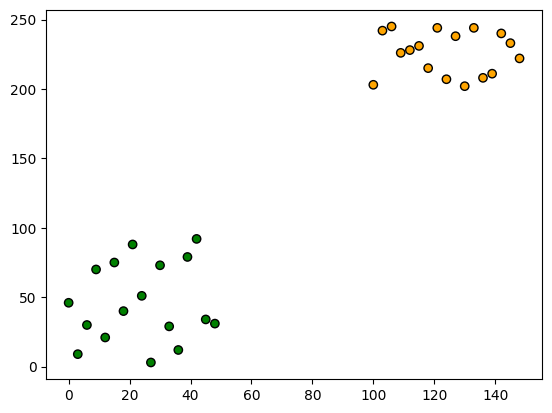

In [59]:
plt.scatter(x, y, c = col, edgecolor = "black")
plt.show()

In [19]:
# But, in real world datasets, where different classes have clusters sporadically scattered throughout the feature space, 
# classification by a linear margin is not practical.
# Certain datasets are difficult for a linear classifier to classify using a hyperplane.

In [20]:
# Kernalized SVMs are a powerful extensions of linear SVMs.
# They can make up complex models that can go beyond linear decision boundaries.
# Kernalized SVMs can be used for both regression and classification.

In [21]:
# What Kernalized SVMs do is that they take the original features and transform them into a higher dimensional feature space.
# This transformed data becomes easier to classify using a linear classifier.

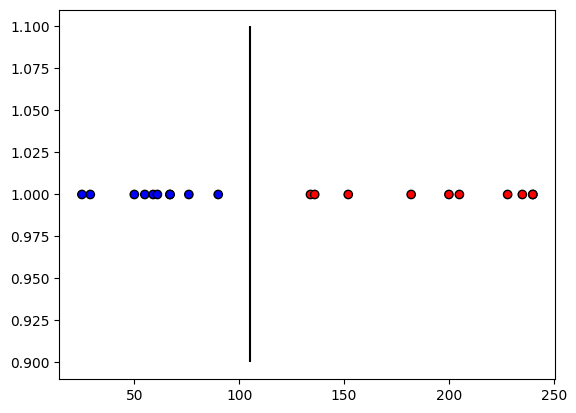

In [52]:
x = np.append(np.random.randint(0, 100, size = 10), np.random.randint(120, 250, size = 10))
clrs = list(map(lambda x: "red" if x >= 120 else "blue", x))
y = np.ones(x.size)
plt.scatter(x, y, c = clrs, edgecolor = "black")
plt.vlines(x = 105, ymax = 1.1, ymin = 0.9, color = "black")
plt.show()

In [35]:
# The above is a linear binary classifier in one dimension, where the black vertical line marks the decision boundary.
# Each data point here has one feature -> its position on the x axis
# If this data is provided to a linear SVM, It'll have no problem 

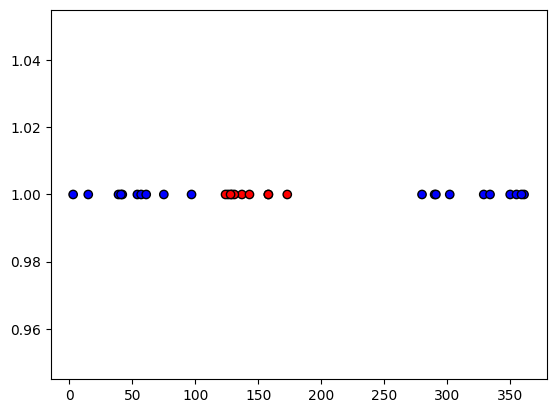

In [51]:
# Let's give the linear SVM a harder problem, where the points are no longer linearly separable.

x = np.append(np.random.randint(0, 100, size = 10), np.random.randint(120, 200, size = 10))
x = np.append(x, np.random.randint(250, 380, size = 10))
clrs = list(map(lambda x: "red" if (x >= 120) and (x < 250) else "blue", x))
y = np.ones(x.size)
plt.scatter(x, y, c = clrs, edgecolor = "black")
plt.show()

In [43]:
# A simple linear decision boundary doesn't have enough expressive power to classify these data points.
# One idea is to transform this data to a 2 dimensional feature space.

# We can generate two dimesnional data points by processing the existing feature -> a feature set of (x_i, x_i^2) can be computed for all data points.

list(zip(x, np.square(x)))[:10]

[(87, 7569),
 (51, 2601),
 (1, 1),
 (28, 784),
 (61, 3721),
 (22, 484),
 (59, 3481),
 (84, 7056),
 (55, 3025),
 (85, 7225)]

In [ ]:
# Here we prepare a second feature that is the square of the first feature.
# We are not adding any new information here.
# Now we'll use the x_i ^2 in the y axes.

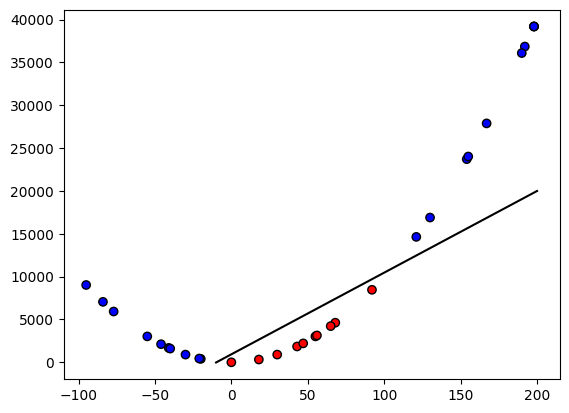

In [50]:
x = np.array([-41, -95, -77, -20, -55, -21, -40, -84, -30, -46,  55,  43,  56, 68,  92,  65,  18,  30,   0,  47, 192, 198, 167, 154, 155,
              198, 198, 130, 190, 121])

y = np.square(x)
clrs = list(map(lambda x: "red" if (x >= 0) and (x < 100) else "blue", x))

plt.scatter(x, y, c = clrs, edgecolor = "black")
plt.plot([-10, 200], [-20, 20000], color = "black")
# plt.grid()
plt.show()

In [72]:
# We can now learn a linear SVM that classifies the data points in the 2D feature space into two classes.
# For any new data points that need prediction, we can make a 2D transformation and make the predictions on the transformed version.

In [73]:
# However, the if we undo the two dimensional transformation, we'd see that the places where the linear decision boundary in the
# 2 dimensional space corresponds to the place where a parabola crosses the x axis in the 1 dimensional space.

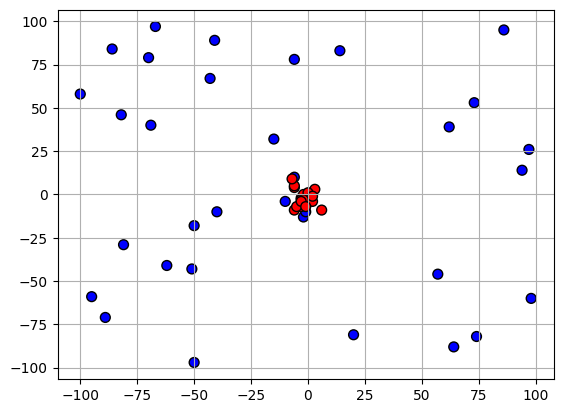

In [44]:
# Let's move to a two dimensional problem.

x_0 = np.append(np.random.randint(-100, 101, size = 30), np.random.randint(-10, 11, size = 20))
x_1 = np.append(np.random.randint(-100, 101, size = 30), np.random.randint(-10, 11, size = 20))

clrs = list(map(lambda x, y: "red" if (x > -10) & (x < 10) & (y > -10) & (y < 10) else "blue", x_0, x_1))
plt.scatter(x_0, x_1, c = clrs, s = 50, edgecolor = "black")
plt.grid(which = "major")
plt.show()

In [90]:
# Here each data point has two features -> represented in x and y axes.
# As with this, a linear SVM cannot do anything to separate the data points into classes.
# We can add a derived third feature, transforming the data into a 3 dimensional feature space.

Initialy,
## ___$x_i = (x_0, x_1)$___

After 3 dimensional transformation,

## ___$x_i = (x_0, x_1, x_2)$___
Where,
## ___$x_2 = 1 - (x_0^2 + x_1^2)$___

In [2]:
# Now we have 3 features -> x_0, x_1, x_2
# x_0 & x_1 are real authentic features
# while x_2 is a derived feature.

In [66]:
x_0 = np.append(np.random.randint(-100, 101, size = 30), np.random.randint(-10, 11, size = 20))
x_1 = np.append(np.random.randint(-100, 101, size = 30), np.random.randint(-10, 11, size = 20))
x_2 = 1 - (np.square(x_0) + np.square(x_1))

clrs = list(map(lambda x_0, x_1: "red" if (x_0 > -10) & (x_0 < 10) & (x_1 > -10) & (x_1 < 10) else "blue", x_0, x_1))

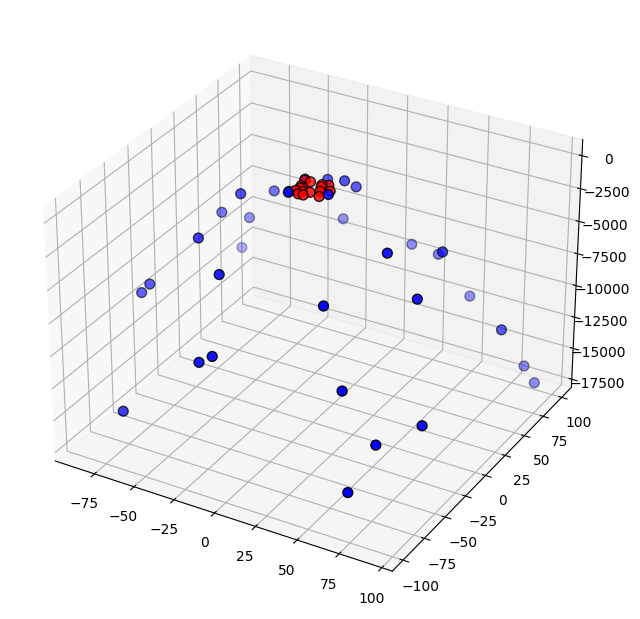

In [111]:
fig = plt.figure(figsize = (6, 6))
axes = fig.add_axes(rect = (1, 1, 1, 1), projection = "3d")
axes.scatter(x_0, x_1, x_2, c = clrs, s = 50, edgecolor = "black")
plt.show()

In [68]:
# Here, this transformation shapes the data points into parabola around 0,0
# Data points close to 0,0 get mapped to higher vertcial positions.
# closer to 0,o -> lower x_0 and lowe x_1 values
# consequently 1 - (x_0^2 + x_1^2) -> higher values.

In [69]:
# Now, we can define a hyperplane that separates the red points from the blue points.

In [107]:
X, Y = np.meshgrid(np.arange(-100, 100, step = 1), np.arange(-100, 100, step = 1))
Z = np.full(X.shape, -3000)

In [108]:
X, X.shape

(array([[-100,  -99,  -98, ...,   97,   98,   99],
        [-100,  -99,  -98, ...,   97,   98,   99],
        [-100,  -99,  -98, ...,   97,   98,   99],
        ...,
        [-100,  -99,  -98, ...,   97,   98,   99],
        [-100,  -99,  -98, ...,   97,   98,   99],
        [-100,  -99,  -98, ...,   97,   98,   99]]),
 (200, 200))

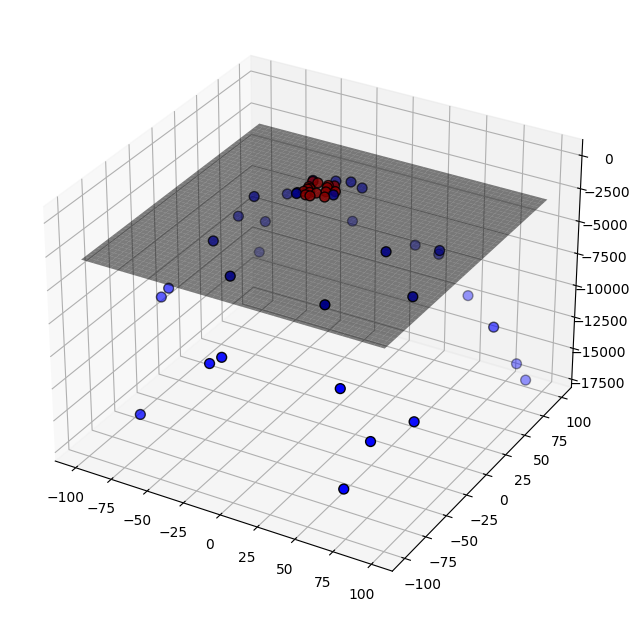

In [109]:
fig = plt.figure(figsize = (6, 6))
axes = fig.add_axes(rect = (1, 1, 1, 1), projection = "3d")
axes.scatter(x_0, x_1, x_2, c = clrs, s = 50, edgecolor = "black")

axes.plot_surface(X, Y, Z, alpha = 0.5, color = "black")
plt.show()

In [112]:
# Here the decision boundary lies in a 3 dimensional feature space where the parabola intersects the maximum margin hyperplane
# This corresponds to an ellipse like decision boundary in 2 dimensional space.

In [113]:
# The idea of transforming the data points to a new feature space where a linear classifier can be easily applied is a very general and powerful one.
# There are different kernels available for doing diferent transformations.
# One type of such kernels is the Radial Basis Function Kernel. (RBF)

# ___Radial Basis Function Kernel___
-----------

In [114]:
# A kernel function in an SVM tells us what is the similarity of two data points in the new feature space given their similarity in the 
# original feature space.
# For RBF, the similarity between two points in the transformed feature space is given by;

# ___$K(x, y) = exp[-\gamma \cdot ||x - y||^2]$___